# Boeuf results

In [1]:
# Scientific libraries
import numpy as np
import scipy


# Graphic libraries
%matplotlib notebook

import matplotlib.pyplot as plt

plt.style.use("presentation")
plt.rcParams["figure.figsize"] = (4, 3)

# Creating alias for magic commands

# LPPview Classes
from LPPview import *
from LPPview.Classes.LPPic_temporal import History
from LPPview.Classes.LPPic_fields import field
from LPPview.Classes.LPPic_fields import field as Field
from LPPview.Classes.LPPic_newwalls import newwalls as Newwalls
from LPPview.Classes.LPPic_temporal import History


In [2]:
path_ref = "/home/tavant/Data/266_Boeuf_166Thomas/"
path_L2 = "/home/tavant/Data/158_Beauf_fakeR/"
path_L4 = "/home/tavant/Data/163_Beauf_fakeR2/"
paths = [path_ref, path_L4, path_L2]
names = ["no $L_R$", "$L_R$=4cm", "$L_R$=2cm"]
colors = ["k","b", "r"]
fields = [Field(path) for path in paths ]
histories = [History(path)for path in paths ]
walls = [Newwalls(path) for path in paths ]



found 18 files
found 0 files
found 0 files
I've found a temporale file !
found 1 files
loading dat file
I've found a temporale file !
found 1 files
loading dat file
I've found a temporale file !
found 1 files
loading dat file
found 15 files
found 0 files
found 0 files


# Temporal evolutions

In [3]:
run = fields[0]
run.definecoords()

In [17]:
def Siz_theo(tab_y):

    siz_0 = 5.23e23
    x0 = 0.627
    Lis = 0.75
    
    siz = siz_0 * np.cos( np.pi * (tab_y - x0)/Lis)
    siz[siz < 0] = 0
    siz[tab_y > 1.5] = 0
    return siz

In [23]:
from scipy.ndimage import gaussian_filter1d as smooth

In [35]:
run.meanfield??

<IPython.core.display.Javascript object>


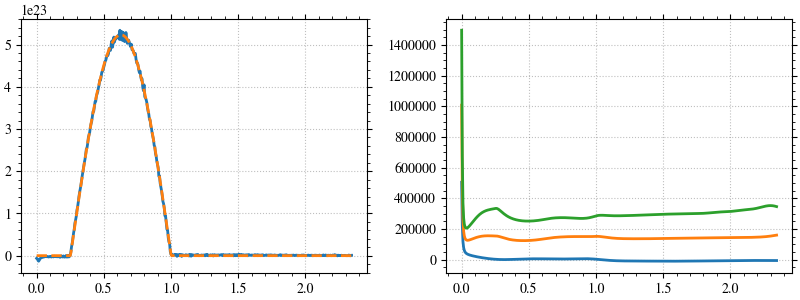

In [44]:
index_z_max = 470

run = fields[0]
run.definecoords()
run.tab_y = run.tab_y[0:index_z_max ]
fig, [ax1, ax2] = plt.subplots(1, 2,figsize=(8,3))
Je = run.meanfield("Je(2)", mean_axis="x")[0:index_z_max ]/(-run.qe)

div_Je = np.gradient(Je, run._dX)
ax1.plot(run.tab_y, div_Je)
ax1.plot(run.tab_y, Siz_theo(run.tab_y), "--")

for run in fields:
    run.definecoords()
    run.tab_y = run.tab_y[0:index_z_max ]
    
    Je = run.meanfield("Je(2)", mean_axis="x")[0:index_z_max ]/(-run.qe)
    ne = run.meanfield("Nume", mean_axis="x")[0:index_z_max ]
    Je_s = Je # smooth(Je, sigma=1)
    div_Je = np.gradient(Je_s, run._dX)
    
    Siz = Siz_theo(run.tab_y)
    
    Losses =  smooth(Siz - div_Je, sigma=20,mode="nearest" )
    
    ax2.plot(run.tab_y, Losses/ne)
    

# Conclusion of the radial losses:
There is an issue on the CPU domain decompositions

In [145]:
def plot7():
    fig, [ax1, ax2] = plt.subplots(1, 2,figsize=(8,3))
    tab = np.array(run.meanfield("Je(2)", mean_axis="x"))
    ax1.plot(run.tab_y, -tab, label="-Je")
    
    tab = np.array(run.meanfield("Ji(2)", mean_axis="x"))
    ax1.plot(run.tab_y, tab, label="Ji")
    
    ax1.set_ylabel("Particle radial current density ")    
    
    
    tab = np.array(run.meanfield("Ej(2)", mean_axis="x"))
    ax2.plot(run.tab_y, tab*1e-3, label="E_y")
    
    ax2.set_ylabel("Radial electric field [kV/m]")
    
    for ax in [ax1, ax2]:
        ax.set_xlabel("Radial direction [cm]")
        
        ax.legend()
        ax.grid(alpha=0.5)
        ax.margins(x=0.01)

plot7()
plt.savefig("R_joule_heating_one.pdf")

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


FigureCanvasNbAgg()

# Mobility

In [ ]:
vez = run.meanfield("Je(2)", mean_axis="x") / run.meanfield("Nume", mean_axis="x")/(-run.qe)
Ez = run.meanfield("Ej(2)", mean_axis="x")

mob = vez / Ez

plt.figure()
plt.plot(run.tab_y)

In [136]:
def returnJeE(run):
    
    imin = int(0.5*run._nT)
    for i in range(imin, run._nT):
        t1 = run.return_fromkey(i, "Je(2)")
        t2 = run.return_fromkey(i, "Ej(2)")
        
        if i == imin:
            tab = t1*t2
        else:
            tab += t1*t2
            
        
    return tab / (run._nT-imin)

In [148]:
def plot7():
    fig, ax1 = plt.subplots(1,1,figsize=(4,3))
            
    tab1 = np.array(run.meanfield("Je(2)", mean_axis="x"))
    tab1 *= np.array(run.meanfield("Ej(2)", mean_axis="x"))

    tab2 = np.array(run.meanfield("jeE(2)", mean_axis="x"))
    tab2 *= -run.qe /(run._dX**2)
    ax1.plot(run.tab_y, tab1, label="<$E_R$><$J_{e, R}$>")
    ax1.plot(run.tab_y, tab2, label="<$J_{e, R}$ $E_R$>")
    ax1.set_ylabel("Joule heating [SI]")    

    # tab = np.array(run.meanfield("Qe(2)", mean_axis="x"))
    
    # ax2.plot(run.tab_y, tab, label="q_r")
    # ax2.set_ylabel("Heat flux [SI]")    

    
    for ax in [ax1]:
        ax.legend(loc="lower center")
        ax.grid(alpha=0.5)
        ax.margins(x=0.01)
        ax.set_xlabel("Radial position [cm]")

    #fig.suptitle("Anormalous Radial Heating")
    fig.tight_layout()
    
plot7()

plt.savefig("R_joule_heating_two.pdf")

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


FigureCanvasNbAgg()

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


# Boeuf Instability

In [59]:
path_ref = "/DATA/tavant/266_Boeuf_166Thomas/"
path_L2 = "/DATA/tavant/158_Beauf_fakeR/"
path_L4 = "/DATA/tavant/163_Beauf_fakeR2/"
paths = [path_ref, path_L4, path_L2]
names = ["no $L_R$", "$L_R$=4cm", "$L_R$=2cm"]
colors = ["k","b", "r"]
fields = [Field(path) for path in paths ]
histories = [History(path)for path in paths ]
walls = [Newwalls(path) for path in paths ]

found 498 files
found 403 files
found 772 files
I've found a temporale file !
found 1 files
loading dat file
I've found a temporale file !
found 1 files
loading dat file
I've found a temporale file !
found 1 files
loading dat file
found 497 files
found 402 files
found 771 files


In [ ]:
for f in fields():
    tab = f.returnfromkey(-1, "Ej(1)")
    plt.figure()
    plt